In [1]:
from pathlib  import Path
import pandas as pd
import pyprojroot

In [2]:
root_path =  pyprojroot.here()
data_processed_folder = (root_path / "data"/'processed')

In [3]:
df = pd.read_csv(data_processed_folder/'pictures.csv')

In [18]:
#black = df[df['color']=='ORANGE']
black = df

In [19]:
black

,filename,b_bgr_mean,g_bgr_mean,r_bgr_mean,h_hsv_mean,s_hsv_mean,v_hsv_mean,l_lab_mean,a_lab_mean,b_lab_mean,...,h_hsv_std,s_hsv_std,v_hsv_std,l_lab_std,a_lab_std,b_lab_std,image,page,color,index
0,2936.jpg,131.881534,93.424017,29.916042,103.393780,217.222161,138.803320,98.520747,126.090249,102.784888,...,19.683627,49.435556,32.906754,32.637751,17.765795,18.998403,https://lh3.googleusercontent.com/ci/AC_FhM_Ub...,https://artsandculture.google.com/asset/the-lo...,BLUE,2936
1,10356.jpg,65.752567,93.429152,108.561169,27.130103,105.862238,111.318639,101.503451,130.187442,146.235670,...,17.766126,47.946678,54.994613,52.942038,10.038349,9.736178,https://lh3.googleusercontent.com/ci/AC_FhM_F2...,https://artsandculture.google.com/asset/a-spir...,BROWN,10356
2,7655.jpg,74.711220,105.099318,139.372485,20.842374,101.887004,139.683823,120.625957,137.489332,150.600602,...,9.881929,52.370741,56.181306,37.231280,15.548931,12.878623,https://lh3.googleusercontent.com/ci/AC_FhM-gX...,https://artsandculture.google.com/asset/edmund...,ORANGE,7655
3,15849.jpg,41.967869,44.120360,39.470688,68.533436,79.039054,48.895295,42.990973,125.795472,128.879913,...,29.759100,40.859004,40.823119,41.407015,3.950034,6.880363,https://lh3.googleusercontent.com/ci/AC_FhM_K4...,https://artsandculture.google.com/asset/portra...,BLACK,15849
4,14497.jpg,56.423428,77.232283,93.434896,15.559275,106.463745,93.446196,81.492530,131.856346,141.928057,...,19.518316,36.499210,79.204950,76.356248,3.770236,12.149282,https://lh3.googleusercontent.com/ci/AC_FhM-kg...,https://artsandculture.google.com/asset/a-woma...,BLACK,14497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16306,3131.jpg,161.425217,125.836356,96.209115,102.554436,137.168778,173.177847,132.736617,131.594352,106.834610,...,32.412803,59.042928,54.803532,60.954770,16.272360,24.555870,https://lh3.googleusercontent.com/ci/AC_FhM-0M...,https://artsandculture.google.com/asset/renewa...,BLUE,3131
16307,9387.jpg,91.198174,107.224118,120.253556,20.629177,63.418925,120.553952,117.247012,130.446974,138.930582,...,19.414917,23.149826,25.260871,23.801078,3.136150,4.670063,https://lh3.googleusercontent.com/ci/AC_FhM-qh...,https://artsandculture.google.com/asset/the-ba...,BROWN,9387
16308,5177.jpg,161.193208,155.540022,146.897757,90.538801,42.812937,167.311821,160.878966,126.642055,124.279038,...,36.147341,33.075517,58.164300,56.516321,7.406085,7.903368,https://lh3.googleusercontent.com/ci/AC_FhM-Gz...,https://artsandculture.google.com/asset/ideal-...,TEAL,5177
16309,102.jpg,164.557297,177.798291,177.949099,32.714439,30.873159,180.720499,181.661645,125.784825,134.939652,...,15.407879,32.657645,66.763639,66.346510,4.510445,6.034761,https://lh3.googleusercontent.com/ci/AC_FhM90X...,https://artsandculture.google.com/asset/the-bo...,WHITE,102


AttributeError: Line2D.set() got an unexpected keyword argument 'opacity'

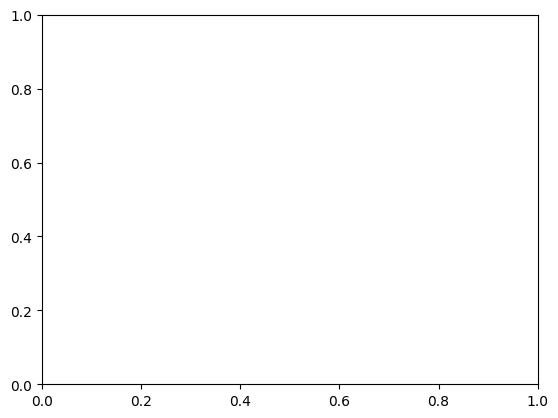

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
#black['r_bgr_mean'].plot(kind='hist')
black['r_bgr_mean'].plot(kind='kde',opacity=0.5)
plt.show()
#black['b_bgr_mean'].plot(kind='kde')
#black['g_bgr_mean'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

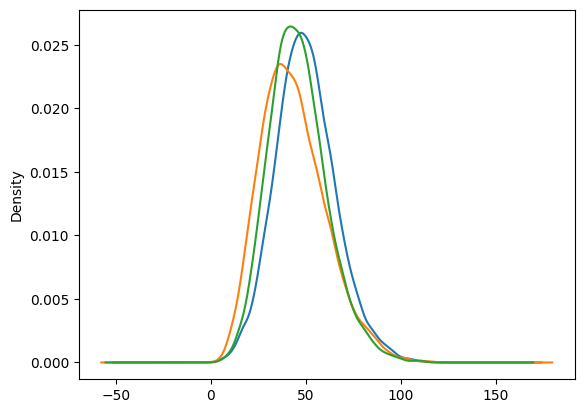

In [22]:
black['r_bgr_std'].plot(kind='kde')
black['b_bgr_std'].plot(kind='kde')
black['g_bgr_std'].plot(kind='kde')